<a href="https://colab.research.google.com/github/jamieth0405/MAT421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6 - Jamie Dinh

3.2 Continuity and Differentiation

Limits and Continuity

- Limits are foundational in calculus for defining continuity, derivatives, and integrals.
- A function is continuous if there are no abrupt changes in value; formally, 𝒇(𝑥) is continuous at a point 𝑎 if $$\lim_{x \to a} f(x) = f(a)$$

Derivatives
- Derivative measures how a function value changes with respect to a change in another variable.
- In single-variable calculus, the derivative at a point is the slope of the tangent line at that point, defined as: $$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$ if this limit exists.
- Derivatives are used to find the rate of change and to solve problems involving optimization.
- Partial Derivatives are derivatives of functions with several variables with respect to one variable, holding others constant.
- The chain rule is used for computing derivatives of composite functions.


In [1]:
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# Define the function
def f(x):
    return x**2 + 4*x

# Calculate the derivative at a specific point
x = 3  # Example point

derivative_at_x = derivative(f, x)

print("The derivative of f(x) = x^2 + 4x at x =", x, "is approximately", derivative_at_x)

# Compare with x plugging into derivative function: 2x + 4
derivative_f_at_x = 2*x + 4
print("The derivative of f(x) = x^2 + 4x at x =", x, "with f'(x) is", derivative_f_at_x)

The derivative of f(x) = x^2 + 4x at x = 3 is approximately 10.000009999799886
The derivative of f(x) = x^2 + 4x at x = 3 with f'(x) is 10


Higher Derivatives

- Higher-order derivatives are taken to provide deeper insight into the function's behavior, such as concavity and inflection points.
- Directional derivatives extend the concept of partial derivatives in the direction of a vector.
- Hessian matrix provides a second-order condition through the Jacobian of the gradient vector and is important in optimization problems.


Mean Value Theorem

- The Mean Value Theorem (MVT) states that for any function that is both continuous on the closed interval [𝑎, 𝑏] and differentiable on the open interval (𝑎, 𝑏), there exists at least one point 𝑐 in (𝑎, 𝑏) such that the derivative at 𝑐 is equal to the average rate of change over [𝑎, 𝑏]: $$ f'(c) = \frac{f(b) - f(a)}{b - a} $$


Taylor's Theorem

- Taylor's Theorem provides a polynomial approximation of differentiable functions around a given point.
- This is important for many applications in both pure and applied mathematics.



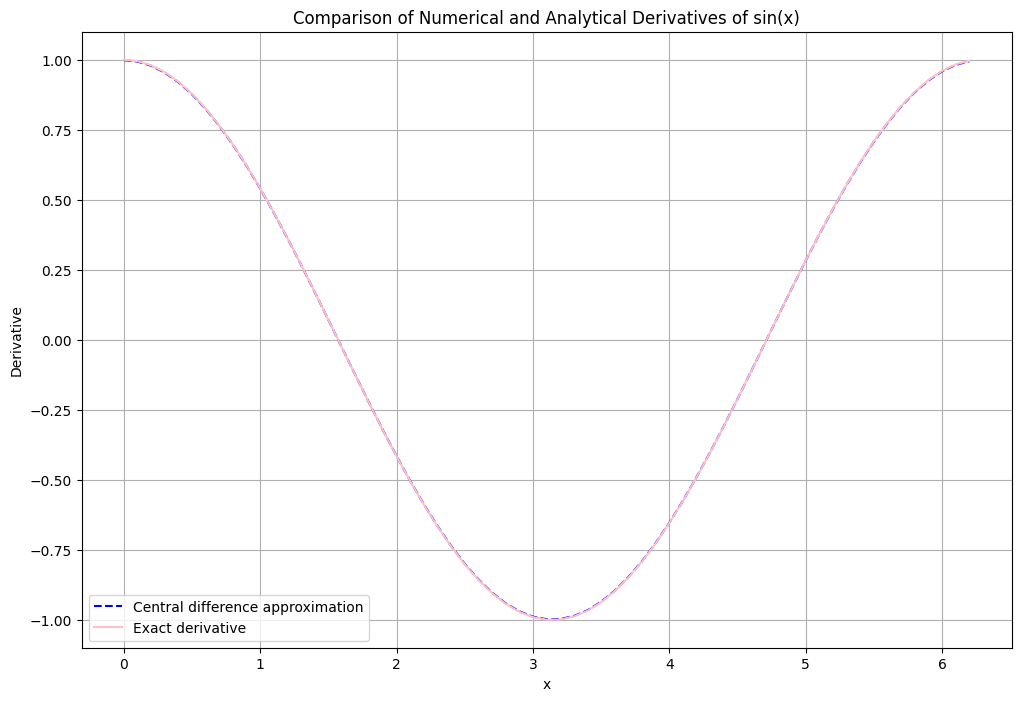

Maximum Error: 0.0016658335317184525


In [2]:
# Referenced https://pythonnumericalmethods.berkeley.edu/

import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)

# Compute the central difference for the derivative
central_diff = (np.sin(x + h) - np.sin(x - h)) / (2 * h)

# Compute the exact derivative
exact_derivative = np.cos(x)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(x, central_diff, 'b--', label='Central difference approximation')
plt.plot(x, exact_derivative, 'pink', label='Exact derivative')
plt.title("Comparison of Numerical and Analytical Derivatives of sin(x)")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.legend()
plt.grid(True)
plt.show()

# Compute maximum error
max_error = np.max(np.abs(central_diff - exact_derivative))
print(f"Maximum Error: {max_error}")

3.3 Unconstrained Optimization

Necessary and Sufficient Conditions of Local Minimizers

- First Derivative Test (Gradient): Explains that for a function to have a local minimum or maximum, the first derivative (or gradient in multivariable cases) should be zero. This is a necessary condition.
- Second Derivative Test (Hessian): Discusses using the second derivative or the Hessian matrix for multivariable functions to determine the nature of the critical points identified by the first derivative test. A positive definite Hessian indicates a local minimum, a negative definite Hessian indicates a local maximum, and an indefinite Hessian indicates a saddle point.


Gradient Descent
- Fundamental algorithm for minimizing a differentiable function.
- The method iteratively moves in the direction of the steepest descent as defined by the negative of the gradient.


Newton's Method
- Describes using Newton's method for finding better approximations to the roots (or zeroes) of a real-valued function, which can also be adapted to find critical points by solving the equation Δ𝒇(𝑥) = 0.


Local Optima
- A point 𝑥\* is considered a **local minimum** of a function 𝒇(𝑥) if there exists an 𝜀 > 0 such that: 𝒇(𝑥\*) ≤ 𝒇(𝑥) for all 𝑥 within $$(x^* - \epsilon, x^* + \epsilon)$$
- Similarly, 𝑥\* is a **local maximum** if: 𝒇(𝑥\*) ≥ 𝒇(𝑥) for all 𝑥 within $$(x^* - \epsilon, x^* + \epsilon)$$
- These points are "local" because the condition only needs to hold in a small neighborhood around 𝑥\*.


Global Optima
- A point 𝑥\* is considered a **global minimum** of a function 𝒇(𝑥) over a domain 𝐷 if: 𝒇(𝑥\*) ≤ 𝒇(𝑥) for all 𝑥 in 𝐷
- 𝑥\* is a **global maximum** if: 𝒇(𝑥\*) ≥ 𝒇(𝑥) for all 𝑥 in 𝐷
- Global optima are the absolute best values that a function can take within the specified domain.



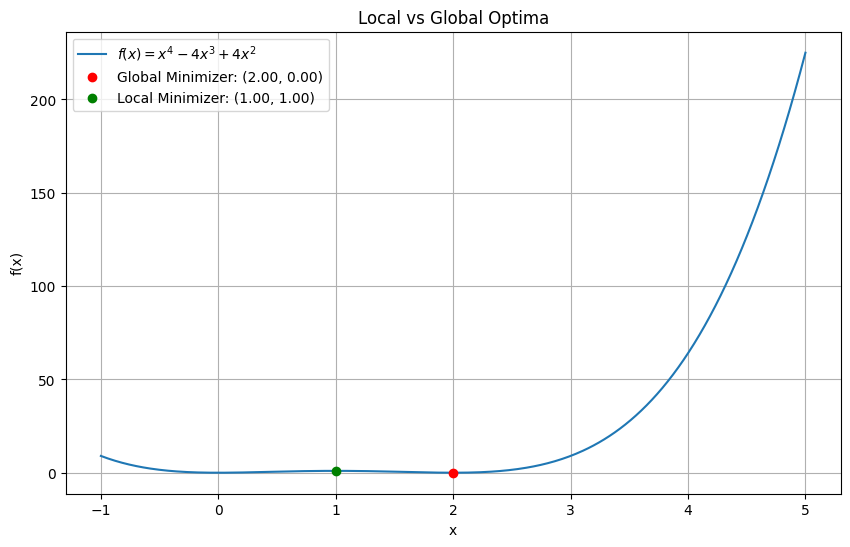

Global minimum at x = 2.00, f(x) = 0.00
Local minimum at x = 1.00, f(x) = 1.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the polynomial function
def f(x):
    return x**4 - 4*x**3 + 4*x**2

# Generate x values for plotting
x_values = np.linspace(-1, 5, 400)
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = x^4 - 4x^3 + 4x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Local vs Global Optima')
plt.grid(True)

# Find global minimum using optimization
result_global = minimize(f, x0=3)
x_global_min = result_global.x
y_global_min = result_global.fun

# Find local minimum using optimization (start from a different point)
result_local = minimize(f, x0=1)
x_local_min = result_local.x
y_local_min = result_local.fun

# Plot the minima
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')

plt.legend()
plt.show()

# Print the results
print(f"Global minimum at x = {x_global_min[0]:.2f}, f(x) = {y_global_min:.2f}")
print(f"Local minimum at x = {x_local_min[0]:.2f}, f(x) = {y_local_min:.2f}")